In [2]:
from IPython.core.display import HTML

print("Setting custom CSS for the IPython Notebook")
styles = open('custom.css', 'r').read()
#HTML(styles)

Setting custom CSS for the IPython Notebook


In [3]:
## all imports
import numpy as np

import pandas as pd
from pandas import Series
from pandas import DataFrame
pd.options.display.mpl_style = 'default'

import matplotlib.pyplot as plt
%matplotlib inline  

import seaborn as sns
sns.set_context("talk")

CS109
=====

Verena Kaynig-Fittkau

vkaynig@seas.harvard.edu

IPython Notebooks:
===================

![IPython](images/ipython.png "IPython")

IPython Notebooks:
===================

* These slides are an IPython notebook!
* https://github.com/damianavila/live_reveal

In [4]:
print "Hello CS109"

print "I love IPython very much"

Hello CS109
I love IPython very much


Todays topics:
===============

* get started with data
* read in a data file
* visualize it

How to load a table
===================

* we use Pandas for this
* Pandas can do a __lot__ more
* more about it later

<img src="images/cute_panda.jpg" width=400 />

In [5]:
#url = 'https://raw.githubusercontent.com/cs109/2014/master/lectures/wur2013.txt'
fname= './wur2013.txt'
ranking = pd.read_table(fname)
#ranking = ranking[:30]
ranking.head()

,qsrank,schoolname,qsstars,overall,academic,employer,faculty,international,internationalstudents,citations,arts,engineering,life,natural,social
0,1,Massachusetts Institute of Technology (MIT),6,100.0,100.0,100.0,100.0,97.6,96.3,99.7,78.7,96.3,90.9,96.3,87.4
1,2,Harvard University,5,99.2,100.0,100.0,99.3,94.1,85.3,100.0,89.7,85.7,98.2,92.3,96.3
2,3,University of Cambridge,5,99.0,100.0,100.0,99.6,95.5,96.0,95.8,93.5,90.5,91.8,97.0,91.2
3,4,UCL (University College London),NaN,98.9,99.9,98.7,98.9,96.5,100.0,95.6,85.6,75.9,85.4,79.6,81.2
4,5,Imperial College London,NaN,98.8,99.9,100.0,99.8,99.9,99.9,92.5,59.5,88.3,85.5,89.4,74.9


In [15]:
dims= ranking.shape
cols= len(ranking.columns)
rows= len(ranking.index)
print dims, rows, cols
names=  list(ranking)
print names
names2= ranking.columns.values.tolist()
print names2

(906, 15) 906 15
['qsrank', 'schoolname', 'qsstars', 'overall', 'academic', 'employer', 'faculty', 'international', 'internationalstudents', 'citations', 'arts', 'engineering', 'life', 'natural', 'social']
['qsrank', 'schoolname', 'qsstars', 'overall', 'academic', 'employer', 'faculty', 'international', 'internationalstudents', 'citations', 'arts', 'engineering', 'life', 'natural', 'social']


Visualization
=============

* Data is now in a Pandas DataFrame
* Lets try a bar plot




Matplotlib
====================



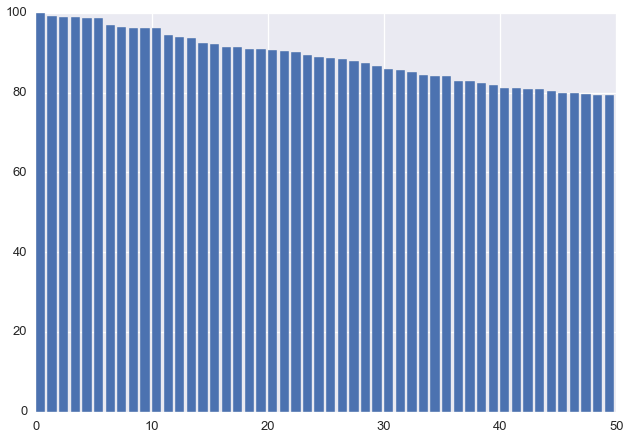

In [19]:
# overall scores of the top 50 schools
data_to_plot = ranking.overall[:50]
plt.bar(data_to_plot.index, data_to_plot)
plt.show()

Plotting with Pandas
====================



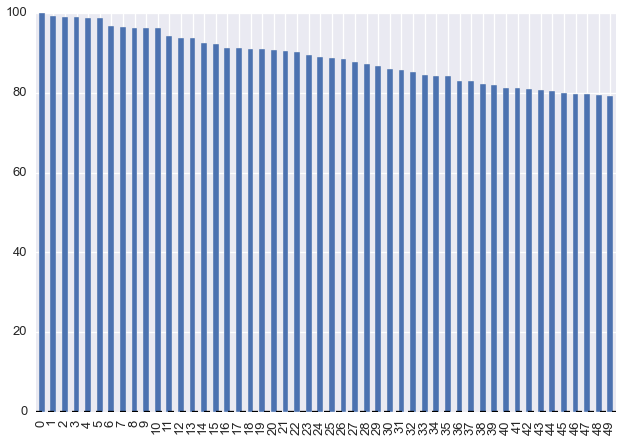

In [20]:
data_to_plot.plot(kind='bar')
plt.show()

How to Rank Universities
========================

* Academic peer review (40%)
* Faculty student ratio (20%)
* Citations per faculty (20%)
* Recruiter review (10%)
* International orientation (10%)

http://en.wikipedia.org/wiki/QS_World_University_Rankings

Selecting a Subframe
====================

In [26]:
relevant_columns = ['academic','faculty','citations','employer','international']
allcols= ['qsrank', 'schoolname', 'overall'] + relevant_columns
ranking_categories=ranking[allcols]
ranking_categories.head()

,qsrank,schoolname,overall,academic,faculty,citations,employer,international
0,1,Massachusetts Institute of Technology (MIT),100.0,100.0,100.0,99.7,100.0,97.6
1,2,Harvard University,99.2,100.0,99.3,100.0,100.0,94.1
2,3,University of Cambridge,99.0,100.0,99.6,95.8,100.0,95.5
3,4,UCL (University College London),98.9,99.9,98.9,95.6,98.7,96.5
4,5,Imperial College London,98.8,99.9,99.8,92.5,100.0,99.9


In [27]:
ranking_categories= ranking_categories[relevant_columns]
ranking_categories.head()

,academic,faculty,citations,employer,international
0,100.0,100.0,99.7,100.0,97.6
1,100.0,99.3,100.0,100.0,94.1
2,100.0,99.6,95.8,100.0,95.5
3,99.9,98.9,95.6,98.7,96.5
4,99.9,99.8,92.5,100.0,99.9


Weighting categories
====================

In [28]:
weights = [0.4,0.2,0.2,0.1,0.1]
ranking_categories_weighted = ranking_categories * weights
ranking_categories_weighted.head()

,academic,faculty,citations,employer,international
0,40.00,20.00,19.94,10.00,9.76
1,40.00,19.86,20.00,10.00,9.41
2,40.00,19.92,19.16,10.00,9.55
3,39.96,19.78,19.12,9.87,9.65
4,39.96,19.96,18.50,10.00,9.99


Multiple Bar Plot
====================

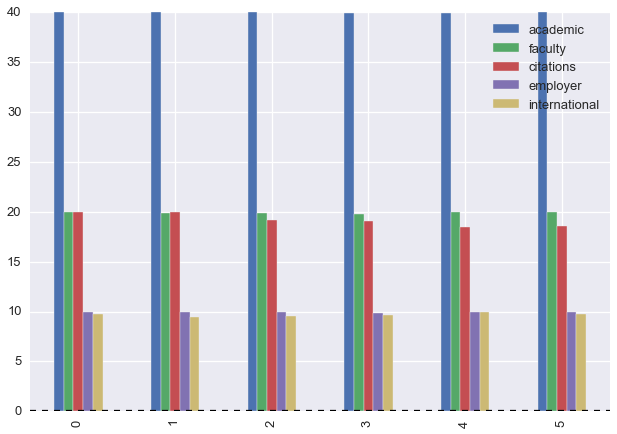

In [31]:
ranking_categories_weighted[:6].plot(kind='bar')
plt.show()

Quiz: Fix the Legend
====================

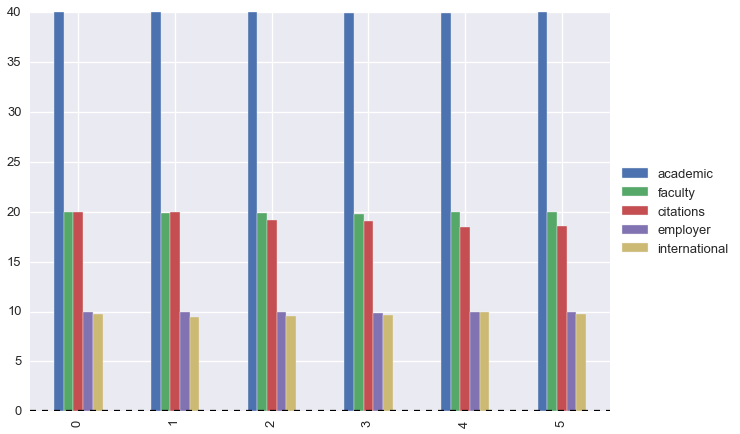

In [32]:
ax = ranking_categories_weighted[:6].plot(kind='bar', legend=False)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Stacked Bar Plot
====================

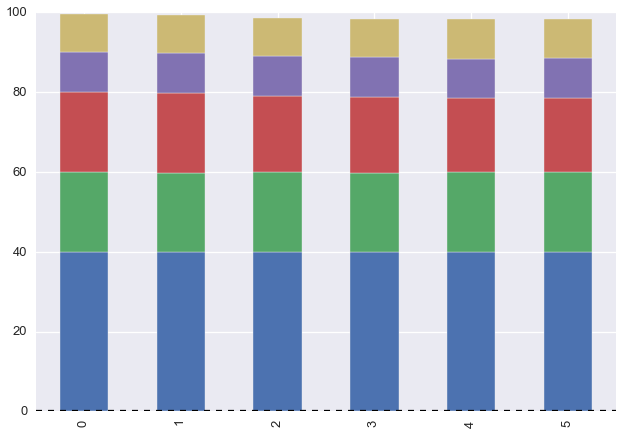

In [33]:
ranking_categories_weighted[:6].plot(kind='bar', legend=False, stacked=True)
plt.show()

Horizontal Barplot
====================

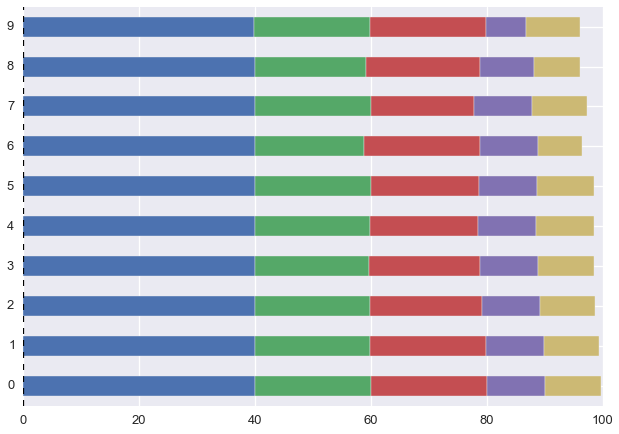

In [34]:
ranking_categories_weighted[:10].plot(kind='barh', legend=False, stacked=True)
plt.show()

In [42]:
mynames= ['schoolname'] + relevant_columns
ranking_categories= ranking[mynames][:20]
ranking_categories.head()

,schoolname,academic,faculty,citations,employer,international
0,Massachusetts Institute of Technology (MIT),100.0,100.0,99.7,100.0,97.6
1,Harvard University,100.0,99.3,100.0,100.0,94.1
2,University of Cambridge,100.0,99.6,95.8,100.0,95.5
3,UCL (University College London),99.9,98.9,95.6,98.7,96.5
4,Imperial College London,99.9,99.8,92.5,100.0,99.9


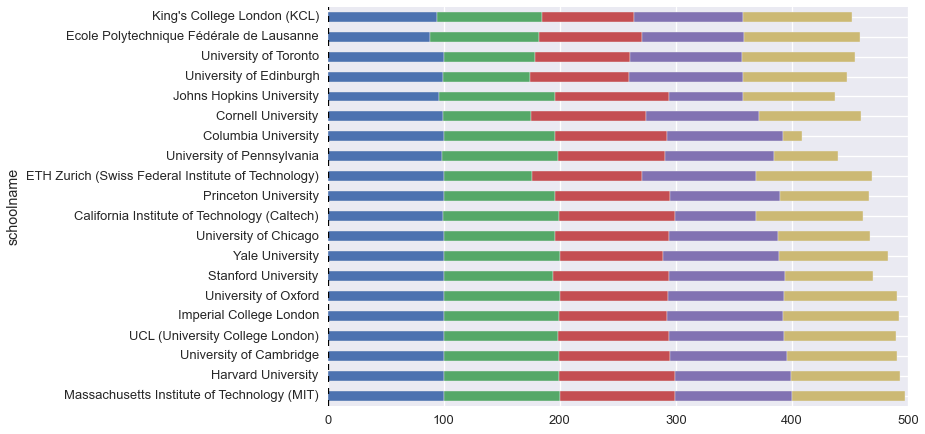

In [43]:
ranking_categories.set_index(ranking_categories.schoolname, inplace= True)
ranking_categories.plot(kind='barh', legend=False, stacked=True)
plt.show()

You Should Know Now
====================

* How to read in a data file 
* How to plot from a DataFrame
* How to get help
* Matplotlib is great
* and can be painful